In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from scipy import stats
from sklearn.cluster import KMeans
from datetime import timedelta as td
from datetime import datetime
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
customer=pd.read_csv("olist_customers_dataset.csv")
geolocation=pd.read_csv("olist_geolocation_dataset.csv")
orderitems=pd.read_csv("olist_order_items_dataset.csv")
orderpayments=pd.read_csv("olist_order_payments_dataset.csv")
orderreview=pd.read_csv("olist_order_reviews_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
products=pd.read_csv("olist_products_dataset.csv")
seller=pd.read_csv("olist_sellers_dataset.csv")
category=pd.read_csv("product_category_name_translation.csv")



In [3]:
data = orders.merge(customer, on="customer_id").merge(orderitems, on="order_id").merge(products, on="product_id").merge(category, on="product_category_name").merge(orderpayments, on="order_id").merge(seller, on="seller_id").merge(orderreview, on="order_id")

In [4]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


In [5]:
data.rename(columns={'customer_zip_code_prefix':'zip_code'})

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06 00:00:00,c5da6424f1f5decedef8672a1a0103e1,88350,...,314.32,95910,lajeado,RS,a6a6d2f97b28e8aca22046635855fe63,5,Pedido entregue,Recebi em 3 dias muito rápido tudo perfeito pa...,2018-08-25 00:00:00,2018-08-27 16:43:30
115605,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16 00:00:00,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,...,77.50,17201,jau,SP,6b7c670a784ae6d3f17ee1d4b28d197e,5,NaN,NaN,2018-08-04 00:00:00,2018-08-05 22:10:19
115606,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,2018-08-24 03:24:24,2018-08-24 15:14:00,2018-08-28 02:06:35,2018-09-03 00:00:00,428f4721a509be8c52de6ec2900ba918,12305,...,24.69,17201,jau,SP,24e88b5f641a6a3219ce7a730509d570,5,NaN,Excelente,2018-08-28 00:00:00,2018-08-31 00:26:10
115607,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,8d80e477643ec569b24592ce3d9dfc4c,9951,...,84.63,17201,jau,SP,ad0de1dda4fa03e8efb68c481b31ebf8,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42


In [6]:
(data.isnull().sum() / len(data) ).sort_values(ascending=False)


review_comment_title             0.880623
review_comment_message           0.576971
order_delivered_customer_date    0.020760
order_delivered_carrier_date     0.010337
order_approved_at                0.000121
product_length_cm                0.000009
product_height_cm                0.000009
product_width_cm                 0.000009
product_weight_g                 0.000009
payment_installments             0.000000
product_category_name_english    0.000000
payment_sequential               0.000000
payment_type                     0.000000
order_id                         0.000000
payment_value                    0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
seller_state                     0.000000
product_description_lenght       0.000000
product_photos_qty               0.000000
customer_id                      0

In [6]:
data.describe()


,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958,4.034409
std,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968,1.385584
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000,4.000000
50%,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000,5.000000
75%,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000,5.000000


In [31]:
data['review_score'].value_counts()

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64

In [35]:
data['review_score'].count()

115609

5    56.547501
4    18.987276
1    12.582065
3     8.405920
2     3.477238
Name: review_score, dtype: float64

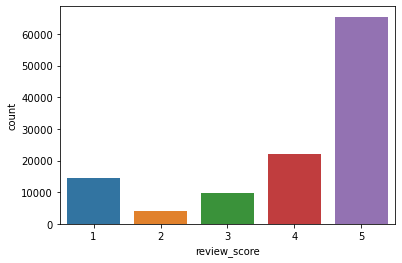

In [40]:

sns.countplot(data['review_score'])
data['review_score'].value_counts()/data['review_score'].count() *100

## Finding the customers generating most revenue

In [52]:
top_customer=data.groupby('customer_unique_id')["payment_value"].sum().reset_index().sort_values("payment_value",ascending=False)

In [53]:
top_customer

,customer_unique_id,payment_value
3724,0a0a92112bd4c708ca5fde585afaa872,109312.64
71634,c402f431464c72e27330a67f7b94d4fb,44048.00
23445,4007669dec559734d6f53e029e360987,36489.24
87489,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00
43207,763c8b1c9c68a0229c42c9fc6f662b93,29099.52
...,...,...
40726,6f5b9d1cdccc4d28f0483a612edecacf,11.63
14826,2878e5b88167faab17d4fb83a986d38b,11.63
65527,b33336f46234b24a613ad9064d13106d,10.89
69097,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07


In [55]:
# Percentage

top_customer["% of sales"]=top_customer["payment_value"]/(top_customer["payment_value"].sum()) * 100

top_customer["% of sales"]

3724     0.548496
71634    0.221019
23445    0.183091
87489    0.151464
43207    0.146012
           ...   
40726    0.000058
14826    0.000058
65527    0.000055
69097    0.000051
18134    0.000048
Name: % of sales, Length: 93396, dtype: float64

## Who are the top customers?

Text(0.5, 1.0, 'Top 10 Customers by total paid')

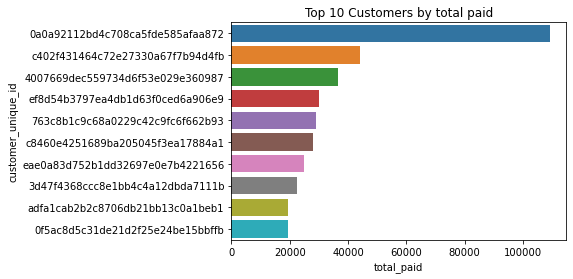

In [57]:
top_customer.rename(columns={'payment_value':'total_paid'}, inplace= True)
ax = sns.barplot(x="total_paid", y="customer_unique_id", data=top_customer[:10])
ax.set_title("Top 10 Customers by total paid")

## Top category products

In [60]:
data['product_category_name'].value_counts()

cama_mesa_banho                  11847
beleza_saude                      9944
esporte_lazer                     8942
moveis_decoracao                  8743
informatica_acessorios            8105
                                 ...  
artes_e_artesanato                  24
la_cuisine                          15
cds_dvds_musicais                   14
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 71, dtype: int64

cama_mesa_banho                  10.247472
beleza_saude                      8.601406
esporte_lazer                     7.734692
moveis_decoracao                  7.562560
informatica_acessorios            7.010700
                                   ...    
artes_e_artesanato                0.020760
la_cuisine                        0.012975
cds_dvds_musicais                 0.012110
fashion_roupa_infanto_juvenil     0.006920
seguros_e_servicos                0.001730
Name: product_category_name, Length: 71, dtype: float64

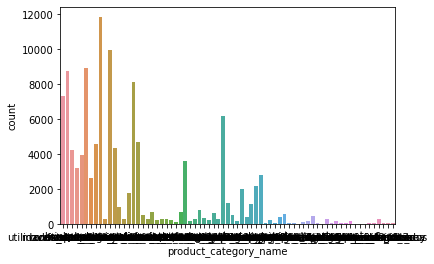

In [61]:
sns.countplot(data['product_category_name'])
data['product_category_name'].value_counts()/data['product_category_name'].count() *100

In [6]:
data['seller_id'].value_counts()

4a3ca9315b744ce9f8e9374361493884    2128
6560211a19b47992c3666cc44a7e94c0    2111
1f50f920176fa81dab994f9023523100    2009
cc419e0650a3c5ba77189a1882b7556a    1885
da8622b14eb17ae2831f4ac5b9dab84a    1656
                                    ... 
63bc58679c44e8a998792119fd7ad23e       1
0b1ca3ef18a63d7eb0c8897fa0849c08       1
3e51f9cbe317bc3a88f2c76583811ee4       1
c8143b3069f6746a77421b5ce30a450c       1
b6f52e346160519c24a23af05410ad32       1
Name: seller_id, Length: 3028, dtype: int64

In [7]:
data['seller_id'].count()

115609

In [9]:

data['seller_id'].value_counts()/data['seller_id'].count() *100

4a3ca9315b744ce9f8e9374361493884    1.840687
6560211a19b47992c3666cc44a7e94c0    1.825982
1f50f920176fa81dab994f9023523100    1.737754
cc419e0650a3c5ba77189a1882b7556a    1.630496
da8622b14eb17ae2831f4ac5b9dab84a    1.432414
                                      ...   
63bc58679c44e8a998792119fd7ad23e    0.000865
0b1ca3ef18a63d7eb0c8897fa0849c08    0.000865
3e51f9cbe317bc3a88f2c76583811ee4    0.000865
c8143b3069f6746a77421b5ce30a450c    0.000865
b6f52e346160519c24a23af05410ad32    0.000865
Name: seller_id, Length: 3028, dtype: float64

## Cities with highest revenue generation

In [7]:
top_city=data.groupby('customer_city')["payment_value"].sum().reset_index().sort_values("payment_value",ascending=False)

In [8]:
top_city

,customer_city,payment_value
3574,sao paulo,2807526.03
3135,rio de janeiro,1536347.93
451,belo horizonte,492767.96
556,brasilia,428036.30
1139,curitiba,327886.88
...,...,...
3383,santo antonio do rio abaixo,24.23
3770,tamboara,24.09
1947,jenipapo de minas,22.58
2908,polo petroquimico de triunfo,20.70


In [9]:
# Percentage

top_city["% of sales"]=top_city["payment_value"]/(top_city["payment_value"].sum()) * 100

top_city["% of sales"]

3574    14.087265
3135     7.708901
451      2.472552
556      2.147749
1139     1.645231
          ...    
3383     0.000122
3770     0.000121
1947     0.000113
2908     0.000104
3201     0.000102
Name: % of sales, Length: 4093, dtype: float64

Text(0.5, 1.0, 'TOP 10 cities by revenue generation')

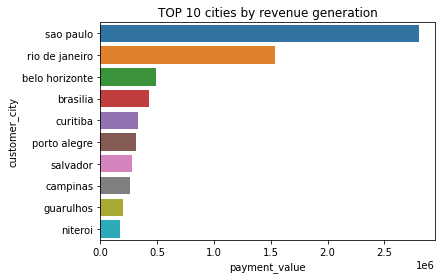

In [10]:
ax = sns.barplot(x="payment_value", y="customer_city", data=top_city[:10])
ax.set_title("TOP 10 cities by revenue generation")

## Rating of products

In [22]:
plt.figure(figsize=(12,12))
top_rating=data.groupby('product_category_name_english')["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)

top_rating


,mean,count
product_category_name_english,,
cds_dvds_musicals,4.642857,14
fashion_childrens_clothes,4.500000,8
books_general_interest,4.438503,561
books_imported,4.419355,62
flowers,4.419355,31
...,...,...
home_comfort_2,3.642857,28
fashion_male_clothing,3.548611,144
office_furniture,3.526791,1773


<Figure size 864x864 with 0 Axes>

In [23]:
bestrated = top_rating[top_rating["count"]>=30][:10]
bestrated

,mean,count
product_category_name_english,,
books_general_interest,4.438503,561
books_imported,4.419355,62
flowers,4.419355,31
costruction_tools_tools,4.415842,101
books_technical,4.375465,269
food_drink,4.324138,290
small_appliances_home_oven_and_coffee,4.320513,78
luggage_accessories,4.295945,1159
fashion_sport,4.258065,31


In [24]:
# Bottom 10 Products by review socre
worstrated = top_rating[top_rating["count"]>=30].sort_values(by='mean')[:10]
worstrated

,mean,count
product_category_name_english,,
diapers_and_hygiene,3.256410,39
office_furniture,3.526791,1773
fashion_male_clothing,3.548611,144
fixed_telephony,3.672862,269
fashio_female_clothing,3.780000,50
furniture_mattress_and_upholstery,3.804878,41
audio,3.840849,377
furniture_bedroom,3.841270,126
party_supplies,3.847826,46


## Is there any relationship between delivery time and review scores


In [26]:
data["order_delivered_customer_date"] 

0         2017-10-10 21:25:13
1         2017-10-10 21:25:13
2         2017-10-10 21:25:13
3         2017-08-18 14:44:43
4         2017-08-07 18:30:01
                 ...         
115604    2018-08-24 13:06:25
115605    2018-08-03 17:46:46
115606    2018-08-28 02:06:35
115607    2018-07-27 14:04:10
115608    2018-07-27 14:04:10
Name: order_delivered_customer_date, Length: 115609, dtype: object

In [26]:
data["order_approved_at"]

0         2017-10-02 11:07:15
1         2017-10-02 11:07:15
2         2017-10-02 11:07:15
3         2017-08-15 20:05:16
4         2017-08-02 18:43:15
                 ...         
115604    2018-08-21 11:50:47
115605    2018-07-29 18:30:31
115606    2018-08-24 03:24:24
115607    2018-07-24 10:31:25
115608    2018-07-24 10:31:25
Name: order_approved_at, Length: 115609, dtype: object

In [27]:
data["order_purchase_timestamp"]

0         2017-10-02 10:56:33
1         2017-10-02 10:56:33
2         2017-10-02 10:56:33
3         2017-08-15 18:29:31
4         2017-08-02 18:24:47
                 ...         
115604    2018-08-21 11:29:05
115605    2018-07-28 17:55:27
115606    2018-08-23 12:31:37
115607    2018-07-23 18:35:14
115608    2018-07-23 18:35:14
Name: order_purchase_timestamp, Length: 115609, dtype: object

In [27]:
data["order_delivered_carrier_date"] 

0         2017-10-04 19:55:00
1         2017-10-04 19:55:00
2         2017-10-04 19:55:00
3         2017-08-17 15:28:33
4         2017-08-04 17:35:43
                 ...         
115604    2018-08-21 15:37:00
115605    2018-07-30 14:54:00
115606    2018-08-24 15:14:00
115607    2018-07-24 14:37:00
115608    2018-07-24 14:37:00
Name: order_delivered_carrier_date, Length: 115609, dtype: object

In [29]:
data["order_estimated_delivery_date"]

0         2017-10-18 00:00:00
1         2017-10-18 00:00:00
2         2017-10-18 00:00:00
3         2017-08-28 00:00:00
4         2017-08-15 00:00:00
                 ...         
115604    2018-09-06 00:00:00
115605    2018-08-16 00:00:00
115606    2018-09-03 00:00:00
115607    2018-08-06 00:00:00
115608    2018-08-06 00:00:00
Name: order_estimated_delivery_date, Length: 115609, dtype: object

In [7]:

data['diff_app_pur'] = (pd.to_datetime(data.order_approved_at) - pd.to_datetime(data.order_purchase_timestamp)).dt.seconds
data['diff_car_app'] = (pd.to_datetime(data.order_delivered_carrier_date) - pd.to_datetime(data.order_approved_at)).dt.days
data['diff_del_car'] = (pd.to_datetime(data.order_delivered_customer_date) - pd.to_datetime(data.order_delivered_carrier_date)).dt.days
data['diff_est_act'] = (pd.to_datetime(data.order_estimated_delivery_date) - pd.to_datetime(data.order_delivered_customer_date)).dt.days


print(str.format('Average time taken for the order to get approved: {:.2f} seconds', data.diff_app_pur.mean()))
print(str.format('Average time taken for the order to be passed to the logistic partner: {:.0f} days', data.diff_car_app.mean()))
print(str.format('Average time taken for the order to be delivered by the logistic partner: {:.0f} days', data.diff_del_car.mean()))
print(str.format('Average time taken between estimated delivery date and actual delivery date: {:.0f} days', data.diff_est_act.mean()))


Average time taken for the order to get approved: 14344.27 seconds
Average time taken for the order to be passed to the logistic partner: 2 days
Average time taken for the order to be delivered by the logistic partner: 9 days
Average time taken between estimated delivery date and actual delivery date: 11 days


In [8]:
data['diff_del_pur'] = (pd.to_datetime(data.order_delivered_customer_date) - pd.to_datetime(data.order_purchase_timestamp)).dt.days

print(str.format('Average time taken for the order to get delivered: {:.0f} days', data.diff_del_pur.mean()))

Average time taken for the order to get delivered: 12 days


## What are the sellers' cities with lowest/highest delivery time?

In [37]:
sellersdeliverytime = data.groupby('seller_city')["diff_del_pur"].agg(["min", "max", "mean", "std", "count" ]).dropna().sort_values("mean").reset_index()

In [38]:
sellersdeliverytime = sellersdeliverytime[sellersdeliverytime["count"]>=30]


In [39]:
fastestdeliverysellers = sellersdeliverytime[:10]
slowestdeliverysellers = sellersdeliverytime.sort_values("mean", ascending=False)[:10]

In [40]:
fastestdeliverysellers

,seller_city,min,max,mean,std,count
13,varzea paulista,2.0,21.0,5.243243,3.443233,37
44,hortolandia,1.0,71.0,7.151429,6.671363,350
58,ribeirao preto / sao paulo,2.0,27.0,7.625000,4.067933,40
59,ferraz de vasconcelos,1.0,20.0,7.631579,6.322081,38
62,rio claro,1.0,34.0,7.710526,6.229709,114
65,vicente de carvalho,1.0,42.0,7.877828,6.587075,221
70,poa,1.0,38.0,8.057143,6.023626,175
72,carazinho,3.0,19.0,8.163934,3.933532,61
78,betim,1.0,53.0,8.375796,6.231851,314
85,maua,1.0,42.0,8.502066,5.454688,484


In [41]:
slowestdeliverysellers

,seller_city,min,max,mean,std,count
516,mombuca,6.0,88.0,22.575758,17.776442,33
509,itaquaquecetuba,1.0,194.0,21.383506,12.929833,1734
507,congonhal,4.0,60.0,21.083333,12.764675,108
504,balneario camboriu,3.0,79.0,20.258065,17.427885,31
503,tubarao,6.0,81.0,19.485714,20.325833,35
497,foz do iguacu,2.0,92.0,18.973958,17.304309,192
492,bombinhas,5.0,68.0,18.423913,9.793734,92
491,criciuma,3.0,71.0,17.971429,15.867995,35
489,claudio,5.0,48.0,17.620155,8.167383,129
483,caucaia,3.0,138.0,17.323529,23.017412,34


## States with highest/lowest time to delivery


In [43]:
highestTTDstates = data.groupby("customer_state")["diff_del_pur"].mean().dropna().sort_values(ascending=False).reset_index()
highestTTDstates = highestTTDstates[:10]

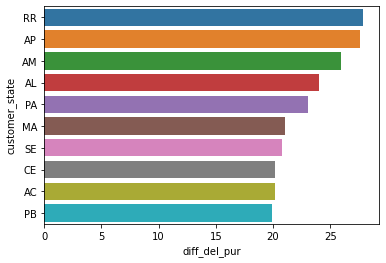

In [44]:
ax = sns.barplot(y="customer_state", x="diff_del_pur", data=highestTTDstates)


In [45]:
lowestTTDstates = data.groupby("customer_state")["diff_del_pur"].mean().dropna().sort_values(ascending=True).reset_index()
lowestTTDstates = lowestTTDstates[:10]


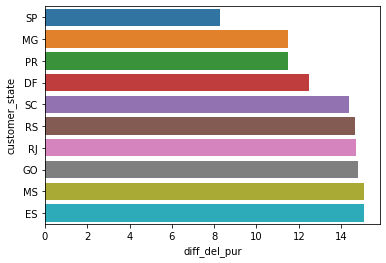

In [46]:
ax = sns.barplot(y="customer_state", x="diff_del_pur", data=lowestTTDstates)

## How does average deliverytime vary across time?


In [9]:
delivered_order = orders[orders['order_status'] == 'delivered']
delivered_order = delivered_order.fillna(0)
delivered_order = delivered_order[delivered_order['order_delivered_customer_date'] != 0]
delivered_order = delivered_order[delivered_order['order_approved_at'] != 0]
time = (pd.to_datetime(delivered_order['order_delivered_customer_date']) - pd.to_datetime(delivered_order['order_approved_at'])).dt.days

In [10]:
print(time)

0         8
1        12
2         9
3        13
4         2
         ..
99436     8
99437    22
99438    24
99439    17
99440     7
Length: 96456, dtype: int64


In [10]:
delivered_order['delivery_time (days)'] = time
delivered_order = delivered_order[delivered_order['delivery_time (days)'] > 0]
delivered_order = delivered_order.sort_values('order_approved_at')
delivered_order = delivered_order.set_index(pd.to_datetime(delivered_order['order_approved_at']).dt.date, drop=True)

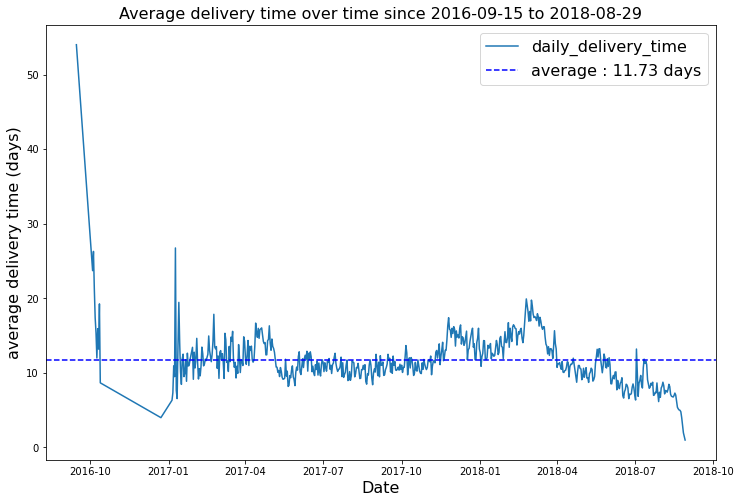

In [11]:
delivery_days_average = delivered_order.groupby(delivered_order.index).mean()
global_average = float(delivery_days_average.mean())

plt.figure(figsize = (12,8))
plt.plot(delivery_days_average.index, delivery_days_average, label = 'daily_delivery_time')
plt.axhline(y=global_average, linestyle='--', color='blue', label = 'average : ' + str(global_average)[:5] + ' days')
plt.xlabel('Date', fontsize=16)

plt.ylabel('average delivery time (days)', fontsize=16)
plt.title('Average delivery time over time since ' + str(delivery_days_average.index[0]) + ' to ' + str(delivery_days_average.index[-1]) , fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

## RFM ANALYSIS

## What is RFM analysis?

#### RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

#### Let’s assume we are a company, our company name is geek, let’s perform the RFM analysis on our customers

#### Recency: How recently has the customer made a transaction with us

#### Frequency: How frequent is the customer in ordering/buying some product from us

#### Monetary: How much does the customer spend on purchasing products from us.

source: geekforgeeks

In [12]:
# Calculate recency 

df_recency = data.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()

In [13]:
df_recency

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93392,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93393,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93394,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [14]:
df_recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace=True)


In [15]:
#df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.days

df_recency["LastPurchaseDate"]= pd.to_datetime(df_recency['LastPurchaseDate']).dt.date

In [16]:
recent_date = pd.to_datetime(data['order_purchase_timestamp']).dt.date.max()



In [17]:
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

In [22]:
df_recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,119
2,0000f46a3911fa3c0805444483337064,2017-03-10,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,293


In [19]:
#Frequency

df_frequency = data.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()

In [20]:
df_frequency.rename(columns={'order_id':'Frequency'},inplace=True)

In [21]:
df_frequency.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [23]:
#Calculating monetary value

df_monetary  =  data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

In [24]:
df_monetary.rename(columns={'payment_value':'Monetary'},inplace=True)


In [25]:
df_monetary.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [26]:
# Merging dfs
rf_df = df_recency.merge(df_frequency, on='customer_unique_id')
rfm_df = rf_df.merge(df_monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


In [27]:
# Remove zeros from data before log trans
rfm_df[rfm_df.columns[1:]] = rfm_df[rfm_df.columns[1:]].applymap(lambda x: 1 if x ==0 else x)

In [28]:
rfm_df[rfm_df.columns[1:]]

,Recency,Frequency,Monetary
0,116,1,141.90
1,119,1,27.19
2,542,1,86.22
3,326,1,43.62
4,293,1,196.89
...,...,...,...
93391,452,1,4134.84
93392,267,1,84.58
93393,573,1,112.46
93394,124,1,133.69


In [29]:
# Running K-Means algo to cluster our data
# Let's check if data is skewed first
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

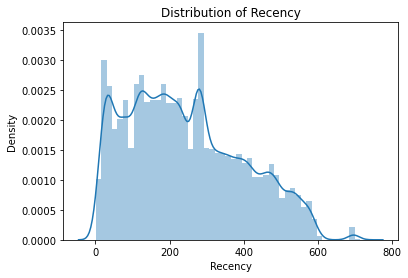

Recency's: Skew: 0.4525743664936904, : SkewtestResult(statistic=53.91755466635981, pvalue=0.0)


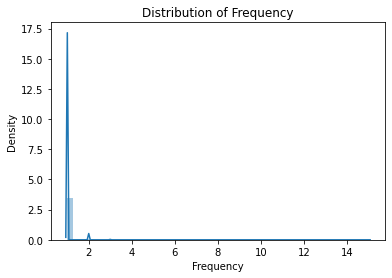

Frequency's: Skew: 10.990942154921314, : SkewtestResult(statistic=335.6456861541721, pvalue=0.0)


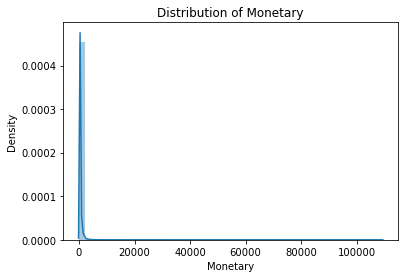

Monetary's: Skew: 70.33621193560055, : SkewtestResult(statistic=524.6379205104615, pvalue=0.0)


In [30]:
for col in rfm_df.columns[1:]:
    check_skew(rfm_df, col)

### A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

We'll log transform Frequency and Monetary as they are highly skwed.

In [31]:
# Perform log transformation 
rfm_df_log = rfm_df.copy()
for c in rfm_df.columns[2:]:
    rfm_df_log[c] = np.log10(rfm_df_log[c])

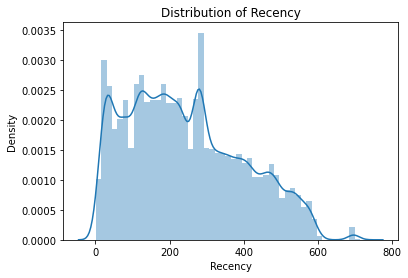

Recency's: Skew: 0.4525743664936904, : SkewtestResult(statistic=53.91755466635981, pvalue=0.0)


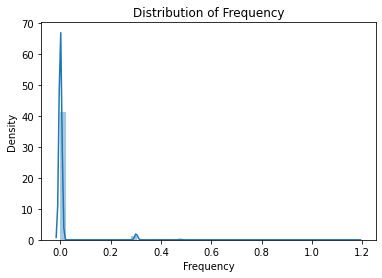

Frequency's: Skew: 6.068294981630156, : SkewtestResult(statistic=275.4417097222108, pvalue=0.0)


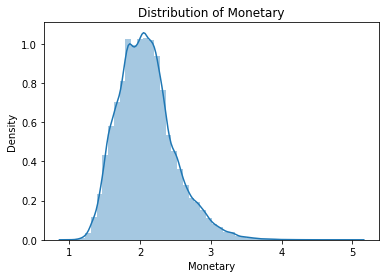

Monetary's: Skew: 0.729609897634013, : SkewtestResult(statistic=81.9204555191681, pvalue=0.0)


In [32]:
for col in rfm_df.columns[1:]:
    check_skew(rfm_df_log, col)

In [33]:
scaler = StandardScaler()
scaler.fit(rfm_df_log.drop("customer_unique_id", axis=1))
RFM_Table_scaled = scaler.transform(rfm_df_log.drop("customer_unique_id", axis=1))
# Put data into a df
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=rfm_df_log.columns[1:])

In [34]:
RFM_Table_scaled.head()

,Recency,Frequency,Monetary
0,-0.826858,-0.172439,0.164274
1,-0.807272,-0.172439,-1.635774
2,1.954465,-0.172439,-0.378506
3,0.544216,-0.172439,-1.120834
4,0.328762,-0.172439,0.521090


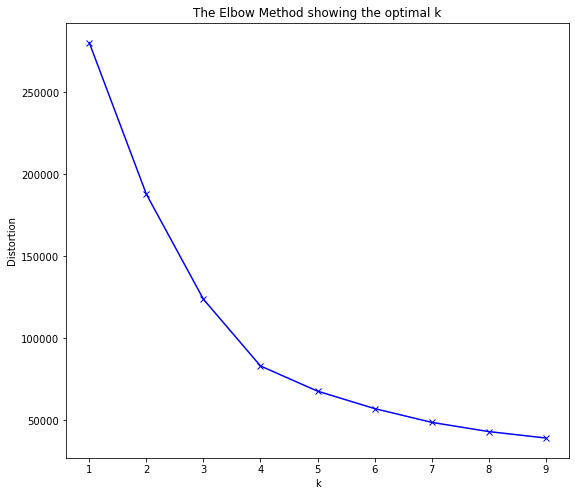

In [35]:
# Training k-means model

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(RFM_Table_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [36]:
# Train the model on 4 clusters
kmean_model = KMeans(n_clusters=4, random_state=5)
kmean_y = kmean_model.fit_predict(RFM_Table_scaled)
# Add labels to df
rfm_df['Cluster'] = kmean_model.labels_

In [37]:
# Function to visualize clusters
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count']
        }).round(0)

    return df_new

In [38]:
rfm_values(rfm_df)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         146.0       1.0     82.0  40300
1         226.0       2.0    488.0   2807
2         426.0       1.0    124.0  27541
3         194.0       1.0    521.0  22748

### The Frequency feature doesn't add that much value to the model since in our data most customers have made on average only one order (mean order per customer is 1.03). Moreover, most customers haven't ordered in a while.



### What does each cluster represent?

Cluster 0 : This cluster can be interpreted as (Relatively New Comers/Low spenders) as their spending is the smallest among all clusters but have the lowest recency. This cluster is quite huge. So, some marketing effort could be advisable towards it in order to increase its monetary value.

Cluster 1 : can be considered as our best one (Loyal customers) since although customers in this cluster haven't on avergae ordered in a while, their frequency of orders is greater than all other clusters and the value of their orders is quite high.

Cluster 3 : (Lost/Low spenders) is the name we can give to this cluster. Customers in this cluster seem have one of the highest recency and their monetary value is low. This cluster shouldn't be the focus of marketing effort.

Cluster 4 : This is our second best (Big spenders) cluster as it's recency comes second and the average amount spent is largest. This cluster is also second in terms of number of customers.